## Springboard: Craft a Story from a Dataset Exercise ##

I read an article written by **Ravi Charan** in **Towards Data Science** that discussed the uniform birthday problem and created a model to understand the variations in birth https://towardsdatascience.com/how-popular-is-your-birthday-91ab133f7fc4] .
Thought the article was interesting I did not think the content of the article was really answering the question raised in the title **"How Popular is your Birthday"**, as in "How Popular is **MY** Birthday" **:)** So I set out to get the data https://github.com/fivethirtyeight/data/tree/master/births] and look into it.
This is the (granular) story...

### 1. The Tools ###

In [754]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Image 
import datetime
from datetime import date
import seaborn as sns

### 2. The Data ###
This is the description of the data provided on github. The title of the original article written by **Carl Bialik** "Some people are too superstitious to have a baby on friday the 13th" amused me because my 13th birthday was a Friday and I was born at 13h00. [https://fivethirtyeight.com/features/some-people-are-too-superstitious-to-have-a-baby-on-friday-the-13th/]

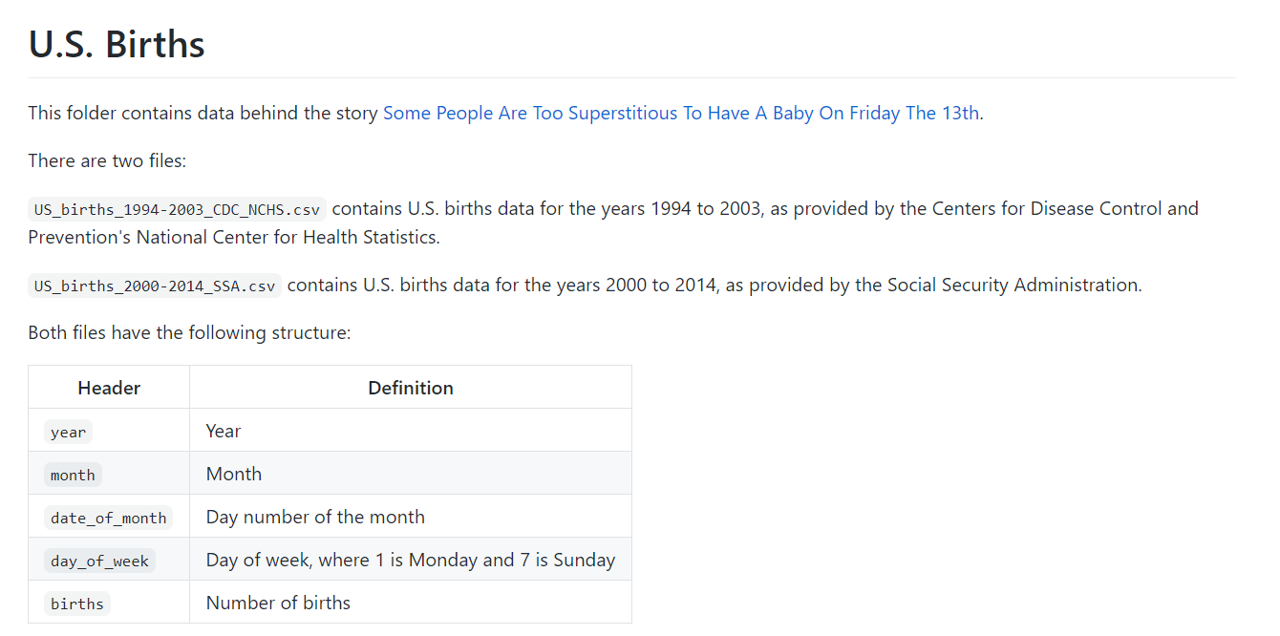

In [755]:
Image(filename = "data_origin.png")

In [756]:
### import the datasets
### C:\Users\Anne\Documents\GIT\TheFoxerine\DataStory_Births
births_94_03 = pd.read_csv("US_births_1994-2003_CDC_NCHS.txt")
births_04_14 = pd.read_csv("US_births_2000-2014_SSA.txt")

In [757]:
### dataframe showing births from 1994 to 2003
births_94_03.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [758]:
### dataframe showing births from 2000 to 2014
births_04_14.head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


In [759]:
### need to drop 200 to 2003 data in births_94_03
births_94_99 = births_94_03[births_94_03['year'].isin([1994,1995,1996,1997,1998,1999])]

In [760]:
### concatenate both dataframes
births=pd.concat([births_04_14,births_94_99], ignore_index=True)
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7670 entries, 0 to 7669
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   year           7670 non-null   int64
 1   month          7670 non-null   int64
 2   date_of_month  7670 non-null   int64
 3   day_of_week    7670 non-null   int64
 4   births         7670 non-null   int64
dtypes: int64(5)
memory usage: 299.7 KB


In [761]:
### Fix dates
births.rename(columns={'date_of_month':'day'}, inplace=True)
births['date'] = pd.to_datetime(births[['year', 'month', 'day']])
pd.to_datetime(births.year, format = "%Y")
births['day_of_week'] = pd.to_datetime(births.day_of_week, format="%d")
births['day_name'] = births['day_of_week'].dt.day_name()

In [762]:
### Set date to index
births.set_index(births.date, inplace=True)

In [763]:
### Looks ok, can't complain
births.head()

,year,month,day,day_of_week,births,date,day_name
date,,,,,,,
2000-01-01,2000,1,1,1900-01-06,9083,2000-01-01,Saturday
2000-01-02,2000,1,2,1900-01-07,8006,2000-01-02,Sunday
2000-01-03,2000,1,3,1900-01-01,11363,2000-01-03,Monday
2000-01-04,2000,1,4,1900-01-02,13032,2000-01-04,Tuesday
2000-01-05,2000,1,5,1900-01-03,12558,2000-01-05,Wednesday


### 3. The Story ###
Birth may happen naturally or can be induced for practical or medical reasons.  According to the CDC the current rate of induction is 23% and "Trends in induction rates vary by gestational age, with rates for most gestational age groups declining since 2010. Induction rates for births at 36, 37, and 38 weeks have declined since 2006, with the largest decrease at 38 weeks." [https://www.cdc.gov/nchs/products/databriefs/db155.htm] In other words there is no need to bother looking at births happening around major holidays because the rate of induction suggests it is not a discrete practice.
My questions are:
- which birthday has the most births? the least birth? is it consistent throughout the years (1994-2014)?
- where does my birthday (03/13) stand?
- how many kids are part of the "13 on Friday 13th" VIP club (like I do)?

In [764]:
### Establish a baseline by looking at the evolution of total birth from 1999-2014
total_births_per_year = births.groupby(['year']).sum()
total_births_per_year.reset_index(inplace=True)
total_births_per_year['births'] = total_births_per_year.births/1000000

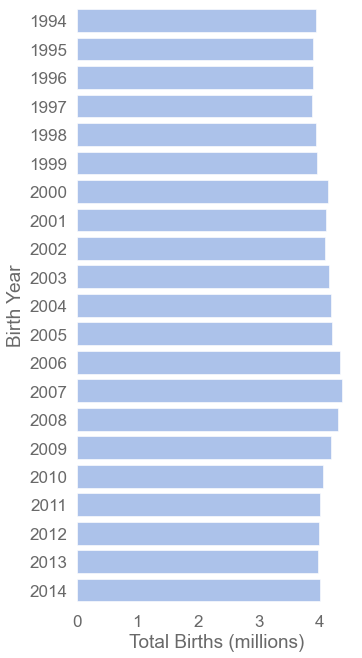

In [765]:
### Plot total births per year
fig0, ax = plt.subplots(figsize=(5,11))
sns.set_theme(style="white")
sns.despine(fig=fig0, left=True, bottom=True)
sns.barplot(x="births", y="year", data=total_births_per_year, ax=ax, orient= 'h', color='cornflowerblue', alpha=0.6)
plt.ylabel('Birth Year', fontsize=19, color='dimgrey')
plt.xlabel('Total Births (millions)', fontsize=19, color='dimgrey')
ax.spines['bottom'].set_color('dimgrey')
ax.spines['top'].set_color('dimgrey')
ax.xaxis.label.set_color('dimgrey')
ax.tick_params(axis='x', color='dimgrey')
plt.grid(False)
plt.setp(ax.get_xticklabels(), size=17, color='dimgrey')
plt.setp(ax.get_yticklabels(), size=17, color='dimgrey');
fig0.savefig('births_peryear.jpeg', transparent = True, bbox_inches = 'tight')

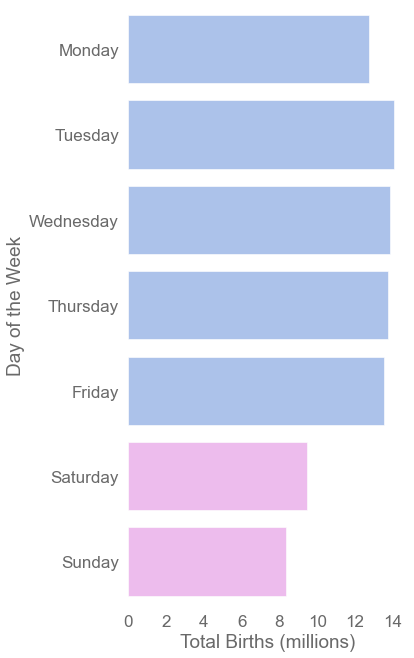

In [766]:
### Plot total births per day of the week

total_births_per_day = births.groupby(['day_name']).sum()
total_births_per_day.reset_index(inplace=True)
total_births_per_day['births'] = total_births_per_day.births/1000000
days_in_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
total_births_per_day['day_name'] = pd.Categorical(total_births_per_day['day_name'], categories=days_in_order, ordered=True)
total_births_per_day = total_births_per_day.sort_values('day_name')

fig00, ax00 = plt.subplots(figsize=(5,11))
sns.set_theme(style="white")
sns.despine(fig=fig00, left=True, bottom=True)
sns.barplot(x="births", y="day_name", data=total_births_per_day, ax=ax00, orient= 'h', alpha=0.6,
           palette=['cornflowerblue' if x in ['Monday','Tuesday','Wednesday','Thursday', 'Friday'] else 'violet' for x in total_births_per_day.day_name])
plt.ylabel('Day of the Week', fontsize=19, color='dimgrey')
plt.xlabel('Total Births (millions)', fontsize=19, color='dimgrey')
ax00.xaxis.label.set_color('dimgrey')
ax00.tick_params(axis='x', color='dimgrey')
plt.grid(False)
plt.setp(ax00.get_xticklabels(), size=17, color='dimgrey')
plt.setp(ax00.get_yticklabels(), size=17, color='dimgrey');
fig00.savefig('births_perday.jpeg', transparent = True, bbox_inches = 'tight')

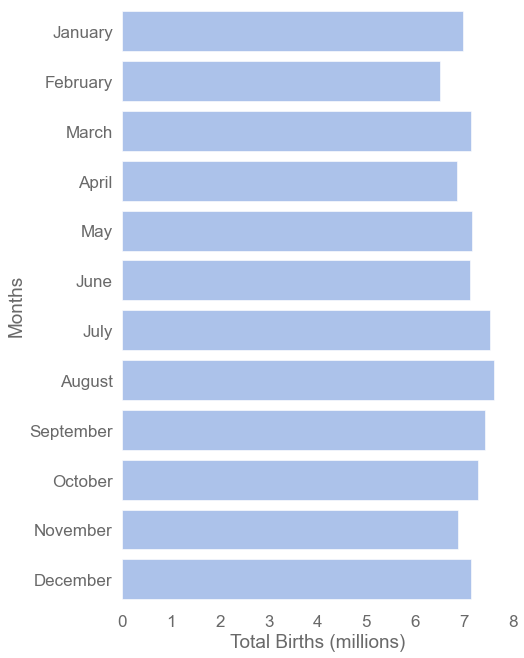

In [767]:
### Plot total births per day of the week

total_births_per_month = births.groupby(['month']).sum()
total_births_per_month.reset_index(inplace=True)
total_births_per_month['births'] = total_births_per_month.births/1000000
months_in_order=['January', 'February','March','April','May','June','July','August','September','October','November','December']
total_births_per_month = total_births_per_month.sort_values('month')

fig01, ax01 = plt.subplots(figsize=(7,11))
sns.set_theme(style="white")
sns.despine(fig=fig01, left=True, bottom=True)
sns.barplot(x="births", y="month", data=total_births_per_month, ax=ax01, orient= 'h', color='cornflowerblue', alpha=0.6)
plt.ylabel('Months', fontsize=19, color='dimgrey')
plt.xlabel('Total Births (millions)', fontsize=19, color='dimgrey')
ax01.xaxis.label.set_color('dimgrey')
ax01.tick_params(axis='x', color='dimgrey')
ax01.set_yticklabels(months_in_order, fontsize=17, color='dimgrey', rotation=0)
plt.grid(False)
plt.setp(ax01.get_xticklabels(), size=17, color='dimgrey')
plt.setp(ax01.get_yticklabels(), size=17, color='dimgrey');
fig01.savefig('births_permonth.jpeg', transparent = True, bbox_inches = 'tight')

In [768]:
total_births_per_month

,month,year,day,births
0,1,1304604,10416,6.979322
1,2,1188372,8671,6.511697
2,3,1304604,10416,7.147368
3,4,1262520,9765,6.850733
4,5,1304604,10416,7.175367
5,6,1262520,9765,7.122586
6,7,1304604,10416,7.527284
7,8,1304604,10416,7.624626
8,9,1262520,9765,7.440659
9,10,1304604,10416,7.293822


In [769]:
births_b= births[['births','year']]

In [770]:
### Create a list spanning the range of years
year_range = np.arange(1994,2015,1)


### Fetch the top 13 most popular birthday for each year
birthday_max = pd.DataFrame()
for y in year_range:
    bmax= births_b.loc[births_b.year==y].nlargest(13, 'births')
    birthday_max = pd.concat([birthday_max,bmax])
    

### Fetch the top 13 least popular birthday for each year    
birthday_min = pd.DataFrame()
for y in year_range:
    bmin = births_b.loc[births_b.year==y].nsmallest(13, 'births') 
    birthday_min = pd.concat([birthday_min,bmin]) 
    
    
### Fetch the births on March 13th
## first make a list of March 13th date
march13th = []
for y in year_range:
    march13th.append(str(y)+'-03-13')
## Fetch the births     
birthday_me = pd.DataFrame()
for y in march13th:
    bme = births_b.loc[y] 
    birthday_me = pd.concat([birthday_me,bme])
    

### Fetch the 13th birthday on Friday 13th
# List the years during which the 13th birthday will occur
year_range_13 = year_range+13

# collect the 13th birthday date that falls on a Friday
b13th_dates=[]
for year in year_range_13:
        for month in range(1, 13):
            thirteenth = date(year, month, 13)
            # Ensure that the 13th is a Friday.
            if thirteenth.weekday() == 4:
                b13th_dates.append(thirteenth.isoformat())
                
# save the data in a VIP dataframe               
vip_club = pd.DataFrame()
vip_club = pd.DataFrame(b13th_dates) 

# work back to the initial birth date
vip_club.rename(columns={0:'thirteenth_birthday'}, inplace=True)
vip_club.thirteenth_birthday = vip_club.thirteenth_birthday.astype('datetime64[ns]')
vip_club['birthday_year'], vip_club['birthday_month'] = vip_club['thirteenth_birthday'].dt.year, vip_club['thirteenth_birthday'].dt.month
vip_club['birth_year'] = vip_club['birthday_year']-13
vip_club['birth_date'] =vip_club.birth_year.astype('str')+vip_club.birthday_month.astype('str')+'13'
vip_club['birth_date'] = pd.to_datetime(vip_club['birth_date'], format='%Y%m%d')

# Fetch the births for each birth_date
vip_club_births = births_b.loc[vip_club.birth_date]
vip_club_births.head()
birthday_me.head()

,births,year
date,,
1994-03-13,8248,1994
1995-03-13,10609,1995
1996-03-13,11338,1996
1997-03-13,11397,1997
1998-03-13,11120,1998


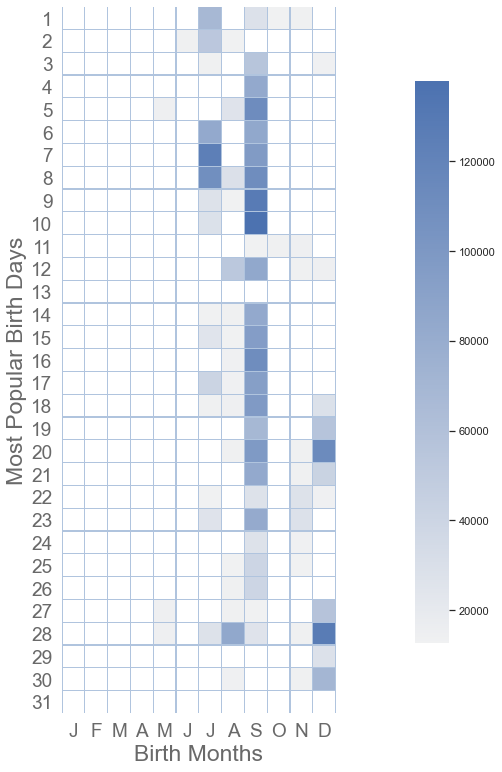

In [771]:
### Plot the heatmap (Month/day) of the most popular birthday throughout the years 

## split date elements into columns
most_popular=birthday_max.copy()
most_popular.reset_index(inplace=True)
most_popular['month'], most_popular['day'] = most_popular.date.dt.month, most_popular.date.dt.day
most_popular = most_popular[['births','day','month']]

# filling missing days and months :day missing 13 and 31, month missing 1,2,3,4
fill_day=[13,31]
fill_month=[1,2,3,4]
df_fd=pd.DataFrame(fill_day, columns=['day'])
df_fm=pd.DataFrame(fill_month, columns=['month'])
most_popular= pd.concat([most_popular,df_fd, df_fm])
most_popular= most_popular.fillna(0)

# group by month and day, sum births, and unstack to make it digestable by heatmap
mp=most_popular.groupby(['day','month']).births.sum().unstack(level=-1)
mp.drop(0.0, inplace=True)
mp.drop(columns=[0.0], inplace=True)


## Plot the heatmap
fig1, ax1 = plt.subplots(figsize=(16,13))
cbar_ax1 = fig1.add_axes([.7, .2, .03, .6])
cmap1=sns.color_palette("light:b", as_cmap=True)
sns.heatmap(mp, cmap=cmap1, square=True, linewidths=.2, linecolor='lightsteelblue', edgecolor='lightsteelblue', ax=ax1, cbar_ax=cbar_ax1)
ylabels=np.arange(1,32,1)

#ax1.set_facecolor('white')
ax1.set_ylabel('Most Popular Birth Days', fontsize=23, color='dimgrey')
ax1.set_xlabel('Birth Months', fontsize=23, color='dimgrey')
ax1.set_yticklabels(ylabels, color='dimgrey', rotation=0, fontsize=19)
ax1.set_xticklabels(['J',  'F',  'M',  'A',  'M',  'J',
                     'J',  'A',  'S',  'O',  'N',
                     'D'],
                    fontsize=19, color='dimgrey', rotation=0)
#ax1.set_title('Most Popular Birthdays (1994-2014)', fontsize=15, color='dimgrey')
fig1.savefig('mostpopular.jpeg', transparent = True, bbox_inches = 'tight')
plt.show()

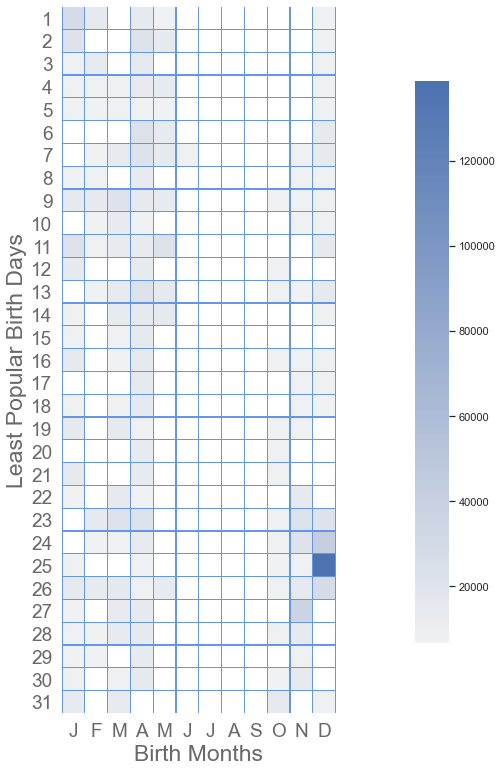

In [772]:
### Plot the heatmap (Month/day) of the least popular birthday throughout the years 

## split date elements into columns
least_popular = birthday_min.copy()
least_popular.reset_index(inplace=True)
least_popular['month'], least_popular['day'] = least_popular.date.dt.month, least_popular.date.dt.day
least_popular = least_popular[['births','day','month']]

# filling missing months 7,8,9
fill_month2=[7,8,9]
df_fm2=pd.DataFrame(fill_month2, columns=['month'])
least_popular= pd.concat([least_popular,df_fm2])
least_popular= least_popular.fillna(0)

# group by month and day, sum births, and unstack to make it digestable by heatmap
lp=least_popular.groupby(['day','month']).births.sum().unstack(level=-1)
lp.drop(0.0, inplace=True)
lp.fillna(1)

## Plot the heatmap
fig2, ax2 = plt.subplots(figsize=(16,13))
cbar_ax2 = fig2.add_axes([.7, .2, .03, .6])
cmap2=sns.color_palette("light:b", as_cmap=True)
sns.heatmap(lp, cmap = cmap2, square=True, linewidths=.2, linecolor='cornflowerblue', edgecolor='cornflowerblue', ax=ax2, cbar_ax=cbar_ax2)
ylabels=np.arange(1,32,1)

#ax1.set_facecolor('white')
ax2.set_ylabel('Least Popular Birth Days', fontsize=23, color='dimgrey')
ax2.set_xlabel('Birth Months', fontsize=23, color='dimgrey')
ax2.set_yticklabels(ylabels, color='dimgrey', rotation=0, fontsize=19)
ax2.set_xticklabels(['J',  'F',  'M',  'A',  'M',  'J', 'J',  'A',  'S',  'O',  'N', 'D'],
                   fontsize=19, color='dimgrey', rotation=0)
#ax2.set_title('LeastPopular Birthdays (1994-2014)', fontsize=15, color='dimgrey')
fig2.savefig('leastpopular.jpeg', transparent = True, bbox_inches = 'tight')
plt.show()

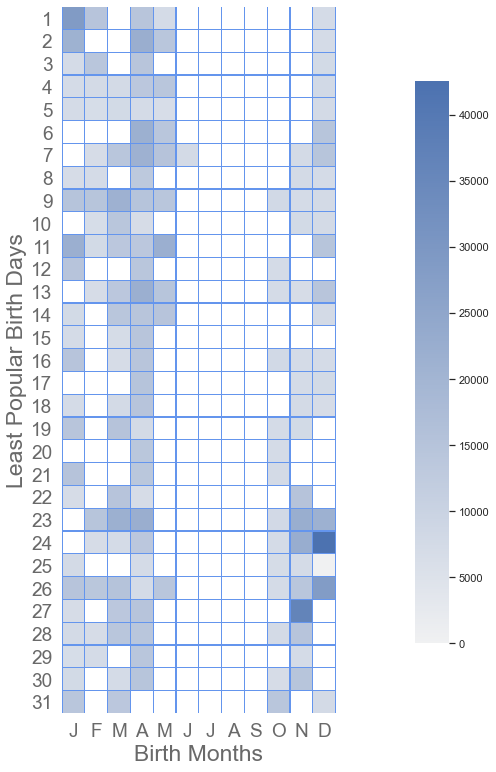

In [773]:
### Plot the heatmap (Month/day) of the least popular birthday throughout the years 

## remove christmas
lp_minusXM=lp.copy()
lp_minusXM.loc[25,12]=0
## Plot the heatmap
fig2b, ax2b = plt.subplots(figsize=(16,13))
cbar_ax2b = fig2b.add_axes([.7, .2, .03, .6])
cmap2b=sns.color_palette("light:b", as_cmap=True)
sns.heatmap(lp_minusXM, cmap = cmap2b, square=True, linewidths=.2, linecolor='cornflowerblue', edgecolor='cornflowerblue', ax=ax2b, cbar_ax=cbar_ax2b)
ylabels=np.arange(1,32,1)

#ax1.set_facecolor('white')
ax2b.set_ylabel('Least Popular Birth Days', fontsize=23, color='dimgrey')
ax2b.set_xlabel('Birth Months', fontsize=23, color='dimgrey')
ax2b.set_yticklabels(ylabels, color='dimgrey', rotation=0, fontsize=19)
ax2b.set_xticklabels(['J',  'F',  'M',  'A',  'M',  'J', 'J',  'A',  'S',  'O',  'N', 'D'],
                   fontsize=19, color='dimgrey', rotation=0)
#ax2.set_title('LeastPopular Birthdays (1994-2014)', fontsize=15, color='dimgrey')
fig2b.savefig('leastpopular_minusXM.jpeg', transparent = True, bbox_inches = 'tight')
plt.show()

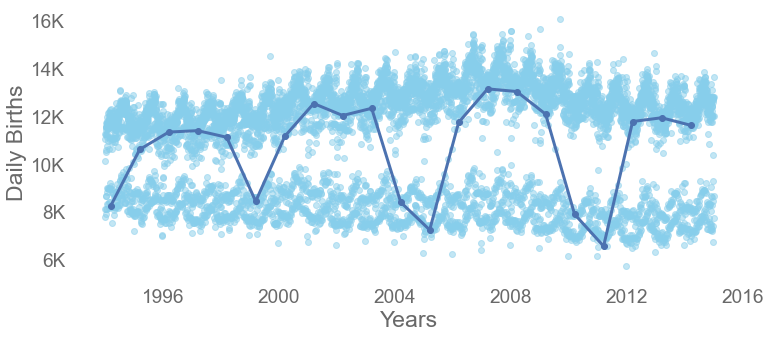

In [774]:
### Plot the March 13th time series
figM13, axM13 = plt.subplots(figsize=[12,5])
fig.subplots_adjust(top=0.95, wspace=0.5)
sns.despine(top=True, bottom=True, left=True, right=True, ax=axM13)
axM13.plot(births_b.births, marker='o', linestyle= 'None', alpha=0.5, color='skyblue')
axM13.plot(birthday_me.births, marker='o', linestyle= '-', linewidth=3)
axM13.set_ylabel('Daily Births', fontsize=23, color='dimgrey')
axM13.set_xlabel('Years', fontsize=23, color='dimgrey')
axM13.set_yticklabels(['4K','6K','8K','10K','12K','14K', '16K'],color='dimgrey', fontsize=19)
axM13.set_xticklabels([1992,1996,2000,2004,2008,2012,2016],fontsize=19, color='dimgrey');
figM13.savefig('mybirthdaythroughtime.jpeg', transparent = True, bbox_inches = 'tight')

In [775]:
### total people born on march 13th
birthday_me.births.sum()

224642

In [776]:
## split date elements into columns
vp = vip_club_births.copy()
vp.reset_index(inplace=True)
vp['month'], vp['year'] = vp.date.dt.month, vp.date.dt.year
vp = vp[['births','year','month']]

# filling missing months and years
fill_month3=[1]
df_fm3=pd.DataFrame(fill_month3, columns=['month'])
vp= pd.concat([vp,df_fm3])
vp= vp.fillna(0)

# group by month and day, sum births, and unstack to make it digestable by heatmap
vpg=vp.groupby(['year','month']).births.sum().unstack(level=-1)
vpg=vpg.drop(0.0, inplace=False)

vpg.fillna(1)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1994.0,1.0,1.0,1.0,11428.0,1.0,1.0,12134.0,1.0,1.0,1.0,1.0,1.0
1995.0,1.0,1.0,1.0,1.0,1.0,11790.0,1.0,1.0,1.0,1.0,1.0,1.0
1996.0,1.0,11322.0,11338.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11065.0,1.0
1997.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,11963.0,1.0,1.0,1.0,1.0
1998.0,1.0,1.0,1.0,1.0,11511.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1999.0,1.0,1.0,1.0,11884.0,1.0,1.0,12646.0,1.0,1.0,1.0,11803.0,1.0
2000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,13299.0,1.0,1.0,12567.0
2001.0,1.0,1.0,1.0,1.0,1.0,12342.0,1.0,1.0,1.0,1.0,1.0,1.0
2002.0,1.0,12069.0,12031.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,12097.0,1.0


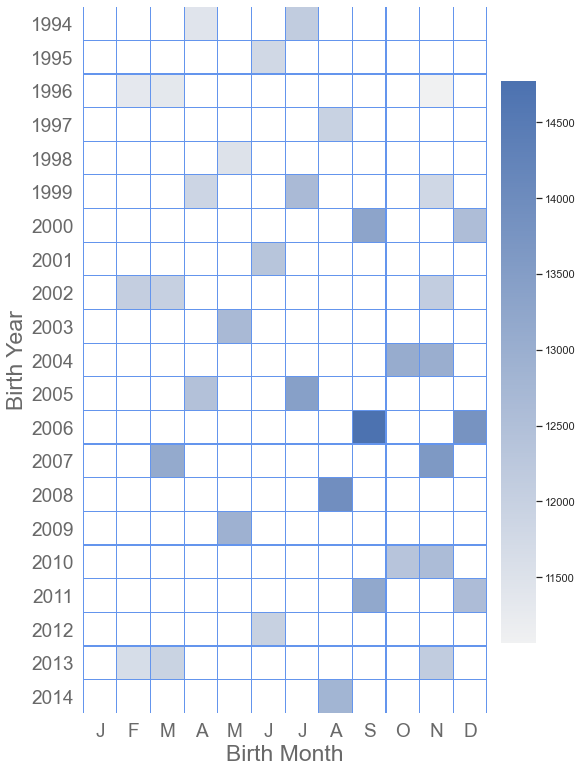

In [777]:
### Plot the VIP Club

### Plot the heatmap  

figvip, axvip = plt.subplots(figsize=(16,13))
cbar_axvip = figvip.add_axes([.7, .2, .03, .6])
cmapvip=sns.color_palette("light:b", as_cmap=True)
sns.heatmap(vpg, cmap = cmapvip, square=True, linewidths=.2, linecolor='cornflowerblue', edgecolor='cornflowerblue', ax=axvip, cbar_ax=cbar_axvip)
ylabels=np.arange(1994,2015,1)

axvip.set_ylabel('Birth Year', fontsize=23, color='dimgrey')
axvip.set_xlabel('Birth Month', fontsize=23, color='dimgrey')
axvip.set_yticklabels(ylabels, color='dimgrey', rotation=0, fontsize=19)
axvip.set_xticklabels(['J',  'F',  'M',  'A',  'M',  'J', 'J',  'A',  'S',  'O',  'N', 'D'],
                      fontsize=19, color='dimgrey', rotation=0)

figvip.savefig('vipclub.jpeg', transparent = True, bbox_inches = 'tight')
plt.show()

In [778]:
### total members of the vip club
vpg.head()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1994.0,NaN,NaN,NaN,11428.0,NaN,NaN,12134.0,NaN,NaN,NaN,NaN,NaN
1995.0,NaN,NaN,NaN,NaN,NaN,11790.0,NaN,NaN,NaN,NaN,NaN,NaN
1996.0,NaN,11322.0,11338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11065.0,NaN
1997.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11963.0,NaN,NaN,NaN,NaN
1998.0,NaN,NaN,NaN,NaN,11511.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [779]:
### vip_club members born on March 13th
m13=vpg.copy()
m13=m13.drop(columns=[1,2,4,5,6,7,8,9,10,11,12], inplace=False)
m13.sum()

month
3    48453.0
dtype: float64

### 4. Summary & The Powerpoint Presentation ###
**U.S. Birth data from 1994 to 2014 showed:**
- About 4 million births per year.
- Birth is more likely to happen on weekdays than weekends.
- Most births happen in Summer. The most popular birth month is September. 
- Xmas is a cumulative popular birthday, though it falls in the unpopular birthday when looking at individual years.

**March 13th:**
- March 13th births time series shows cyclicity. 
- Every 5 years births drop to unpopular rates.
- 224,642 americans were born on March 13th between 1994 and 2014.

**VIP Club, born on a 13th:**
- Almost ½ a million americans were born on 13th between 1994 and 2014 and have 
- celebrated or will celebrate their 13th birthday on a Friday.
- Among them 48,453 were born on March 13th. None in January.

A powerpoint presentation shwoing figures with comments is available in the folder.